In [1]:
# Import packages used in the notebook
import pylab as pl
import pandas as pd
import numpy as np
import os
import json
import scipy.stats
%pylab inline

if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")
    
np.random.seed(1945)

Populating the interactive namespace from numpy and matplotlib


In [6]:
import zipfile

# Read in data
I am reading in data from with terminal commands. Prior to that, I will make sure that I have an environmental variable called PUIDATA set up! I will be using data for the following months and I will join them later: 
January 2015, February 2015, March 2015


In [2]:
# Make sure PUIDATA exists and can access the folder

puidata = os.getenv("PUIDATA")
if not puidata or puidata == 'nfshome/tm1722/PUIdata':
    puidata = '/nfshome/tm1722/PUIDATA'
    
os.environ["PUIDATA"] = puidata

In [3]:
# Get datasets from Citibike's server
!curl https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip?accessType=DOWNLOAD > 201501-citibike-tripdata.zip
!curl https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip?accessType=DOWNLOAD > 201502-citibike-tripdata.zip
!curl https://s3.amazonaws.com/tripdata/201503-citibike-tripdata.zip?accessType=DOWNLOAD > 201503-citibike-tripdata.zip
    


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6845k  100 6845k    0     0  21.2M      0 --:--:-- --:--:-- --:--:-- 21.2M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  16.6M      0 --:--:-- --:--:-- --:--:-- 16.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8221k  100 8221k    0     0  23.2M      0 --:--:-- --:--:-- --:--:-- 23.2M


In [4]:
# move datasets to the PUIDATA folder
!mv 201501-citibike-tripdata.zip $PUIDATA
!mv 201502-citibike-tripdata.zip $PUIDATA
!mv 201503-citibike-tripdata.zip $PUIDATA

In [5]:
# Load data into pandas dataframes

jan = pd.read_csv(os.getenv("PUIDATA") + '/201501' + '-citibike-tripdata.zip')
feb = pd.read_csv(os.getenv("PUIDATA") + '/201502' + '-citibike-tripdata.zip')
mar = pd.read_csv(os.getenv("PUIDATA") + '/201503' + '-citibike-tripdata.zip')

In [6]:
# Check one of the dataframes 
jan.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1


In [7]:
# Concatenate dataframes
three_months = pd.concat([jan, feb, mar], axis=0)

# See the top 3 vales for the new dataframe
three_months.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1


In [8]:
# See bottom 3 values for the new dataframe
three_months.tail(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
341823,171,3/31/2015 23:59,4/1/2015 0:02,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,18943,Subscriber,1986.0,1
341824,616,3/31/2015 23:59,4/1/2015 0:09,455,1 Ave & E 44 St,40.750020,-73.969053,477,W 41 St & 8 Ave,40.756405,-73.990026,21364,Subscriber,1970.0,1
341825,227,3/31/2015 23:55,3/31/2015 23:59,477,W 41 St & 8 Ave,40.756405,-73.990026,478,11 Ave & W 41 St,40.760301,-73.998842,16020,Subscriber,1998.0,1


In [9]:
three_months.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

# Idea and Hypotheses

* Idea: the trip duration is different for bikers that ride during the day and riders that ride at night. 




* Null Hypothesis: There is no statistical difference in the average trip duration of "day riders" and "night riders" at $\alpha$ = 0.05 

* Alt. Hypothesis: On average, trip durations of day riders are different than trip durations of night riders.





* $H_0$: $T_{night}$ - $T_{day}$  = 0

* $H_1$: $T_{night}$ - $T_{day}$ $\neq$ 0


##### Define day vs night riders: 
Day riders -- people who start a ride any time from 4:00 until 17:00.

Night riders -- people who start a ride any time from 18:00 until 5:00. 

##### Data manipulation and extraction: 
* New categorical variable called "ride_type" with following values: day, night 
* New ordinal variables called "tripdurationD" and "tripdurationN" to store trip durations for Day and Night riders, respectively

In [10]:
# Keep only the variables we need
day_n_nite = three_months[['tripduration', 'starttime']]
day_n_nite.dropna(inplace=True)
day_n_nite.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tripduration,starttime
0,1346,1/1/2015 0:01
1,363,1/1/2015 0:02
2,346,1/1/2015 0:04
3,182,1/1/2015 0:04
4,969,1/1/2015 0:05


In [11]:
# Let's extract just hour the ride started from 'starttime' for 
# to make analysis easier
# This line of code will give an error because 'starttime is not
# in the a proper datetimelike value.
# day_n_nite['hour_of_ride'] = day_n_nite['starttime'].dt.hour

In [12]:
# Let's convert 'starttime' to a proper pandas datetime value

day_n_nite['time'] = pd.to_datetime(day_n_nite['starttime'])
day_n_nite.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tripduration,starttime,time
0,1346,1/1/2015 0:01,2015-01-01 00:01:00
1,363,1/1/2015 0:02,2015-01-01 00:02:00
2,346,1/1/2015 0:04,2015-01-01 00:04:00
3,182,1/1/2015 0:04,2015-01-01 00:04:00
4,969,1/1/2015 0:05,2015-01-01 00:05:00


In [13]:
# Now, we can extract the hour of ride from 'time'
day_n_nite['hour_of_ride'] = day_n_nite['time'].dt.hour

# let's see if that worked properly
day_n_nite.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,tripduration,starttime,time,hour_of_ride
0,1346,1/1/2015 0:01,2015-01-01 00:01:00,0
1,363,1/1/2015 0:02,2015-01-01 00:02:00,0
2,346,1/1/2015 0:04,2015-01-01 00:04:00,0
3,182,1/1/2015 0:04,2015-01-01 00:04:00,0
4,969,1/1/2015 0:05,2015-01-01 00:05:00,0


In [14]:
# let's see the last 5 rows as well
day_n_nite.tail()

,tripduration,starttime,time,hour_of_ride
341821,536,3/31/2015 23:58,2015-03-31 23:58:00,23
341822,1030,3/31/2015 23:59,2015-03-31 23:59:00,23
341823,171,3/31/2015 23:59,2015-03-31 23:59:00,23
341824,616,3/31/2015 23:59,2015-03-31 23:59:00,23
341825,227,3/31/2015 23:55,2015-03-31 23:55:00,23


In [15]:
# Let's look at the summary statistics for our variables
day_n_nite.describe()

,tripduration,hour_of_ride
count,8.243080e+05,824308.000000
mean,6.863157e+02,13.710182
std,2.078693e+03,4.860854
min,6.000000e+01,0.000000
25%,3.430000e+02,9.000000
50%,5.180000e+02,14.000000
75%,7.980000e+02,18.000000
max,1.007614e+06,23.000000


In [16]:
day_n_nite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824308 entries, 0 to 341825
Data columns (total 4 columns):
tripduration    824308 non-null int64
starttime       824308 non-null object
time            824308 non-null datetime64[ns]
hour_of_ride    824308 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 31.4+ MB


Text(0,0.5,'Frequency, rides per hour')

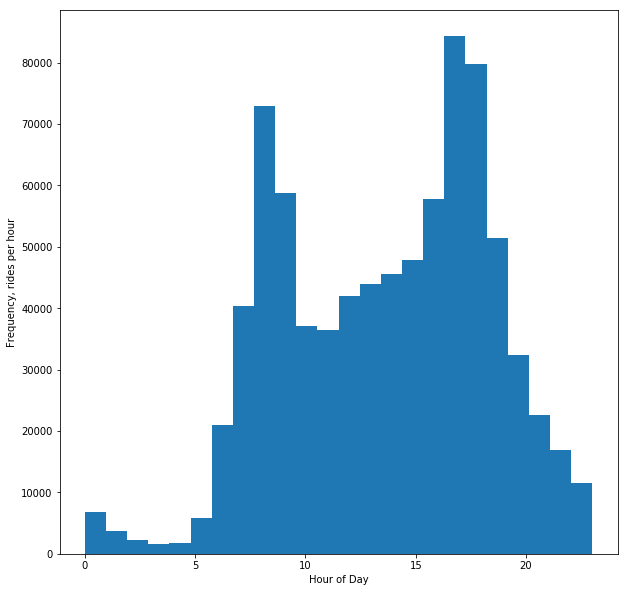

In [17]:
# Let's do a histogram to see the number of trips every hour

plt.figure(figsize=(10,10))
plt.hist(day_n_nite['hour_of_ride'], bins=24, )
plt.xlabel('Hour of Day')
plt.ylabel('Frequency, rides per hour')

### Figure 1: Histogram for rides # per hour of the day

I chose 24 bins -- one for each hour. I could do smaller bins, but  I think a bin per hour is intuitive.

We can see two local maximas around the times people commute to and from work. 

In [18]:
# Let's reproduce the histogram in Figure 1 using pandas:

# The following code will give AttributeError: 'DataFrame' object has no attribute 'cut'
# I think this is because my kernel uses old pandas version (before cut function was available)

#bins = np.arange(24, 99, 5)
#hist_pd = day_n_nite.hour_of_ride.groupby(day_n_nite.cut(day_n_nite.hour_of_ride, bins)).agg([count_nonzero]).plot(kind='bar', legend=False)
#hist_pd.set_title("Figure: Histogram for rides per hour of the day")


In [19]:
# Let's plot a bar chart for average trip length for every hour
# To do that, we need to create to sum trip durations for an hour
# and divide by total number of trips for that hour


In [20]:
# Create sums of number of durations for each hour
sum_trips_hourly = day_n_nite['hour_of_ride'].value_counts()
sum_trips_hourly.sort_index(inplace=True)
sum_trips_hourly

0      6730
1      3738
2      2276
3      1520
4      1697
5      5830
6     21013
7     40423
8     72884
9     58708
10    37044
11    36403
12    41941
13    43982
14    45557
15    47768
16    57790
17    84314
18    79725
19    51493
20    32376
21    22623
22    16984
23    11489
Name: hour_of_ride, dtype: int64

In [21]:
# Create sums of trip durations for each hour

# this is going to do computations we need and store them in a 
# 'DataFrameGroupBy' object, which we need to convert to a pandaas
sum_tripduration_hourly = day_n_nite.groupby('hour_of_ride').sum()

#function t
def i(value):
    return(value)
    
sum_tripduration_hourly.apply(i)
sum_tripduration_hourly = sum_tripduration_hourly['tripduration']
sum_tripduration_hourly

hour_of_ride
0      5982353
1      2628158
2      1538377
3       959316
4      1105579
5      3403006
6     12014509
7     26043301
8     49763725
9     39472637
10    24648433
11    25493389
12    29741489
13    30414899
14    32966572
15    34311422
16    40979538
17    60086731
18    55185732
19    33887793
20    20882338
21    15281774
22    11249076
23     7695398
Name: tripduration, dtype: int64

In [22]:
average_trip_duration_hourly = sum_tripduration_hourly / sum_trips_hourly
average_trip_duration_hourly

hour_of_ride
0     888.908321
1     703.092028
2     675.912566
3     631.128947
4     651.490277
5     583.706003
6     571.765526
7     644.269376
8     682.779828
9     672.355335
10    665.382599
11    700.310112
12    709.126845
13    691.530603
14    723.633514
15    718.293041
16    709.111230
17    712.654257
18    692.201091
19    658.104849
20    644.994379
21    675.497237
22    662.333726
23    669.805727
dtype: float64

Text(0,0.5,'Duration (in Seconds)')

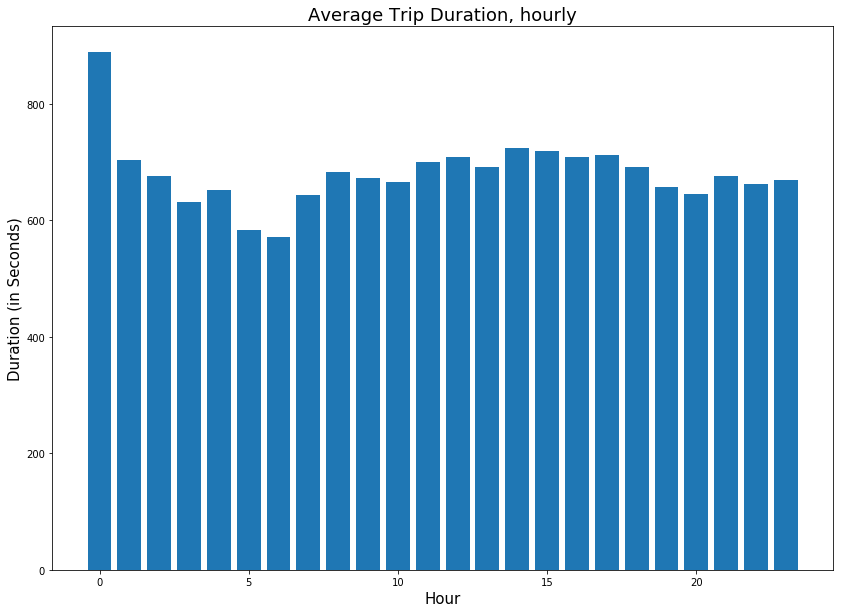

In [23]:
plt.figure(figsize=(14,10))
plt.bar(average_trip_duration_hourly.index, average_trip_duration_hourly)
plt.title("Average Trip Duration, hourly", fontsize=18)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Duration (in Seconds)", fontsize=15)

#### Figure 2: Average Trip Duration 

We can see that trip duration throughtout the day is pretty consistent except for (1) 12 am, when the trips are a bit longer and (2) 5 and 6 am, when the trips are a bit shorter. From this, it may seem that the average duration of night riders is longer than for day riders (in other words, they are not equal). However, let's not jump to conclusions before doing tests since the difference might not be statistically significant (in which case the average durations are basically equal)

In [24]:
# Before performing the tests, let's split data into night and day riders. Before we do that, let's adjust the hours 

In [25]:
night_riders = day_n_nite.loc[(day_n_nite['hour_of_ride'] <= 5) | (day_n_nite['hour_of_ride'] >= 18)]

In [26]:
day_riders = day_n_nite.loc[(day_n_nite['hour_of_ride'] >= 4) | (day_n_nite['hour_of_ride'] <= 17)]

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

##### $H_0$:  Samples of trip durations for day and night riders are drawn from the same continuous distribution at $\alpha$ = 0.05

In [27]:
# Take samples from night rides and day rides dataframes
night_riders_sample = night_riders.sample(n=200, random_state=781994)
day_riders_sample = day_riders.sample(n=200, random_state=781994)

In [28]:
# Perform the Two-Sample KS test 
ks = scipy.stats.ks_2samp(night_riders_sample.tripduration, day_riders_sample.tripduration)
print(ks)

Ks_2sampResult(statistic=0.099999999999999978, pvalue=0.25622118507010427)


We cannot reject the null hypothesis at a 5% since the p-value at 0.25 is higher than 5%. Thus, the samples are drawn from the same distribution.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [29]:
# We need to normalize and sort samples 

#Check how many rows in the night riders dataframe
print("# of rows, night riders:", len(night_riders))
print("# of rows, day riders:", len(day_riders))



# of rows, night riders: 236481
# of rows, day riders: 824308


In [30]:
# Take samples from night rides and day rides dataframes
# and sort them
n_samp_2 = np.random.choice(night_riders.tripduration, size=40000)
n_samp_2_sort = sorted(n_samp_2)

d_samp_2 = np.random.choice(day_riders.tripduration, size=40000)
d_samp_2_sort = sorted(d_samp_2)


In [31]:
# Normalize samples

d_mean = np.mean(d_samp_2_sort)
d_std = np.std(d_samp_2_sort)
n_mean = np.mean(n_samp_2_sort)
n_std = np.std(n_samp_2_sort)

d_samp_2_norm = (d_samp_2_sort - d_mean)/d_std
n_samp_2_norm = (n_samp_2_sort - n_mean)/n_std

Null Hypothesis: trip durations for day rides and night rides are not correllated 

In [32]:
scipy.stats.pearsonr(d_samp_2_norm, n_samp_2_norm)

(0.80127161427832372, 0.0)

The Pearson correlation coefficient measures the linear relationship between two datasets. The closer that number is to 1, the stronger is the positive correlation (as x increases, so does y)

According to Scipy manual, The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. 

As p-value is 0.0<alpha=0.05, we reject our null hypothesis that trip durations for day rides and night rides are not correllated

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

Null Hypothesis: trip durations for day rides and night rides are not correllated 

Unlike Pearson's correlation, The Spearman correlation is nonparametric (doesn't assume datasets follow normal distribution) Unlike the Pearson correlation, the Spearman correlation does not 


The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

In [33]:
scipy.stats.spearmanr(d_samp_2_norm, n_samp_2_norm)

SpearmanrResult(correlation=0.99999874173227021, pvalue=0.0)

Just like in the Pearson's test, the positive correlation implies that as x increases, so does y. Here, we have an almost perfect linear relationship. 

The p-value is 0.0, which is smaller than the alpha of 0.05, so we reject our null hypothesis that trip durations for day rides and night rides are not correllated

###### END OF NOTEBOOK